<a href="https://www.kaggle.com/code/mohamedozil/data-science-project?scriptVersionId=175696238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **<center>Housing Category Classificasion Model</center>**

**importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


***loading the dataset (Part 2)***

In [2]:
data = pd.read_csv("/kaggle/input/real-estate-goldmine/dubai_properties.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

## ***Part 3 : Data Cleaning and Preprocessing***

### ***Cleaning the null and duplicates***

In [4]:
print(data.isna().sum())

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64


***Removing null values***

In [5]:
data.dropna(inplace=True)
print(data.isna().sum())

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64


***Cheking duplicated values***

In [6]:
print(data.duplicated().sum())

0


### ***Encoding***

In [7]:
obj_columns = data.select_dtypes(include=["object"]).columns
for col in obj_columns:
    uniques = data[col].unique()
    print(col, uniques)

Address ['The Gate Tower 2, The Gate Tower, Shams Gate District, Shams Abu Dhabi, Al Reem Island, Abu Dhabi'
 "Water's Edge, Yas Island, Abu Dhabi"
 'Al Raha Lofts, Al Raha Beach, Abu Dhabi' ...
 'Umm Al Quwain Marina, Umm Al Quwain'
 'Al Humrah B, Al Humrah, Umm Al Quwain'
 'Al Huboob 1, Al Salamah, Umm Al Quwain']
Type ['Apartment' 'Penthouse' 'Villa' 'Townhouse' 'Villa Compound'
 'Residential Building' 'Residential Floor' 'Hotel Apartment' ' Apartment'
 'Residential Plot']
Rent_category ['Medium' 'High' 'Low' ' Medium']
Frequency ['Yearly' ' Yearly']
Furnishing ['Unfurnished' 'Furnished' ' Furnished']
Purpose ['For Rent' ' For Rent']
Posted_date ['2024-03-07' '2024-03-08' '2024-03-21' '2024-02-24' '2024-02-16'
 '2023-12-12' '2024-03-11' '2024-02-22' '2024-04-05' '2023-01-29'
 '2024-03-25' '2024-03-22' '2024-04-02' '2024-03-18' '2024-03-14'
 '2023-12-01' '2024-02-27' '2024-03-29' '2024-02-28' '2024-03-30'
 '2024-02-15' '2024-02-13' '2024-04-06' '2024-01-15' '2024-02-06'
 '2023-12-18'

In [8]:
columns_to_label_encoding = ["Rent_category", "Frequency", "Furnishing", "Purpose"]



columns_to_categorical_encoding = ["Address", "Type", "Location", "City"]

***Label Encoding***

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
for col in columns_to_label_encoding:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
for col in columns_to_label_encoding:
    print(col, data[col].unique())

Rent_category [3 1 2 0]
Frequency [1 0]
Furnishing [2 1 0]
Purpose [1 0]


***Date Encoding*** *using (ordinal encoder)*

In [12]:
data["Posted_date"] = pd.to_datetime(
    data["Posted_date"], format="%Y-%m-%d", errors="coerce"
).dt.day_of_year

In [13]:
data["Posted_date"]

0         67.0
1         68.0
2         81.0
3         55.0
4         47.0
         ...  
73729    343.0
73734    335.0
73735     86.0
73737    348.0
73738    348.0
Name: Posted_date, Length: 73023, dtype: float64

***Categorical Ecoding*** *(Target encoder)*

In [14]:
# type this command in terminal: pip install category_encoders
import category_encoders as ce

In [15]:
encoder = ce.TargetEncoder(cols=columns_to_categorical_encoding)
data_encoded = encoder.fit_transform(
    data[columns_to_categorical_encoding], data["Rent_category"]
)

data = pd.concat(
    [data.drop(columns=columns_to_categorical_encoding), data_encoded], axis=1
)

In [16]:
data[columns_to_categorical_encoding]

,Address,Type,Location,City
0,2.657878,2.124840,2.542257,2.129017
1,2.492669,2.124840,1.676570,2.129017
2,2.509815,2.124840,2.183177,2.129017
3,2.233018,1.345865,2.542257,2.129017
4,1.026812,1.664384,1.676570,2.129017
...,...,...,...,...
73729,2.064089,2.124840,2.061570,2.026545
73734,2.058332,1.664384,2.036955,2.026545
73735,2.006843,2.124840,2.048729,2.026545
73737,2.007040,2.124840,2.061570,2.026545


### ***Handling Outilers***

In [17]:
import seaborn as sns

***Handling outliers in 1st column***

In [18]:
print(data.columns[0])

Rent


<Axes: >

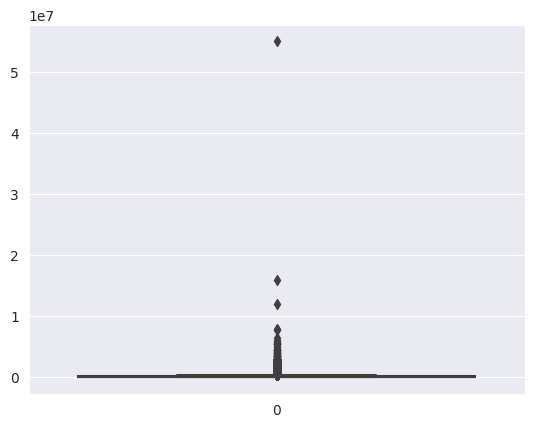

In [19]:
sns.set_style("darkgrid")
sns.boxplot(data=data["Rent"])

In [20]:
num_rent_outiers = (data["Rent"] > 1e7).sum()
print(num_rent_outiers)

3


In [21]:
rent_mean = data["Rent"].mean()
print(rent_mean)
print(data["Rent"].min(), data["Rent"].max())

148372.3144625666
0 55000000


In [22]:
data["Rent"].loc[data["Rent"] > 1e7] = 1e7

/tmp/ipykernel_18/4270086156.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Rent"].loc[data["Rent"] > 1e7] = 1e7
/tmp/ipykernel_18/4270086156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [23]:
# check outliers again
num_rent_outiers = (data["Rent"] > 1e7).sum()
print(num_rent_outiers)

0


***Handling outliers in 2nd column***

In [24]:
print(data.columns[1])

Beds


<Axes: >

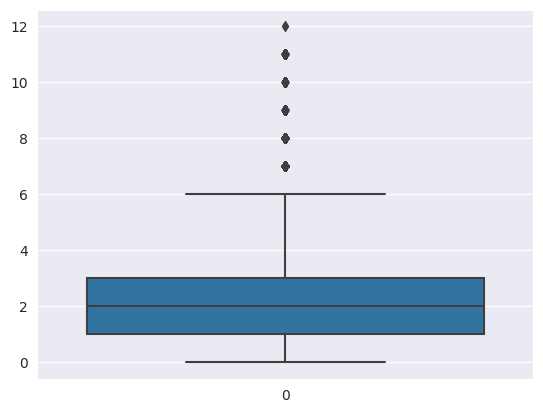

In [25]:
sns.boxplot(data=data["Beds"])

In [26]:
print(data["Beds"].min(), data["Beds"].max())

0 12


***Handling outliers in 3rd column***

In [27]:
print(data.columns[2])

Baths


<Axes: >

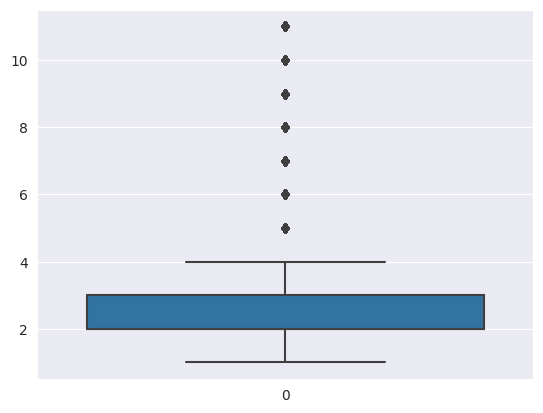

In [28]:
sns.boxplot(data=data["Baths"])

In [29]:
num_baths_outiers = (data["Baths"] > 10).sum()
print(num_baths_outiers)

201


In [30]:
print((data["Baths"]).max())

11


***Handling outliers in 4th column***

In [31]:
print(data.columns[3])

Area_in_sqft


<Axes: >

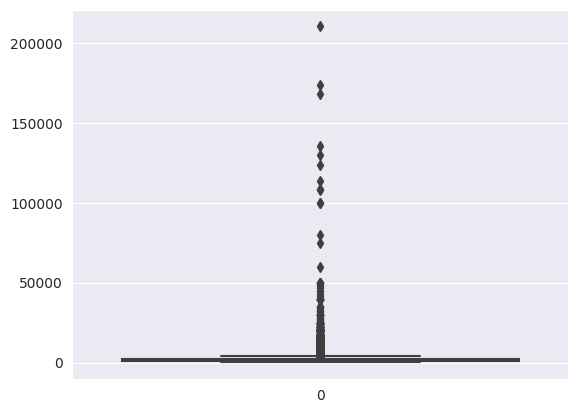

In [32]:
sns.boxplot(data=data["Area_in_sqft"])

In [33]:
area_mean = (data["Area_in_sqft"]).mean()
print(area_mean)

2035.6344713309504


In [34]:
num_area_outiers = (data["Area_in_sqft"] > 10000).sum()
print(num_area_outiers)

1171


In [35]:
(data["Area_in_sqft"]).max()

210254

In [36]:
data["Area_in_sqft"].loc[data["Area_in_sqft"] > 10000] = 10000

/tmp/ipykernel_18/1008635694.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Area_in_sqft"].loc[data["Area_in_sqft"] > 10000] = 10000
/tmp/ipykernel_18/1008635694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [37]:
# check outliers again
num_outiers = (data["Area_in_sqft"] > 10000).sum()
print(num_outiers)

0


***Handling outliers in 5th column***

In [38]:
print(data.columns[4])

Rent_per_sqft


<Axes: >

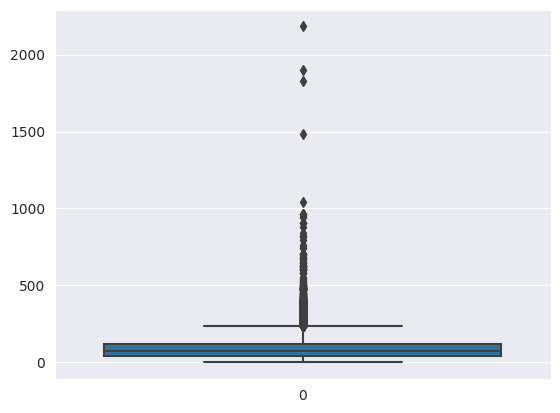

In [39]:
sns.boxplot(data=data["Rent_per_sqft"])

In [40]:
num_rent_sqft_outliears = (data["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

1154


In [41]:
data["Rent_per_sqft"].loc[data["Rent_per_sqft"] > 280] = 280

/tmp/ipykernel_18/84417510.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Rent_per_sqft"].loc[data["Rent_per_sqft"] > 280] = 280
/tmp/ipykernel_18/84417510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [42]:
# check num outliers again
num_rent_sqft_outliears = (data["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

0


***Handling outliers in 6th column***

In [43]:
print(data.columns[5])

Rent_category


<Axes: >

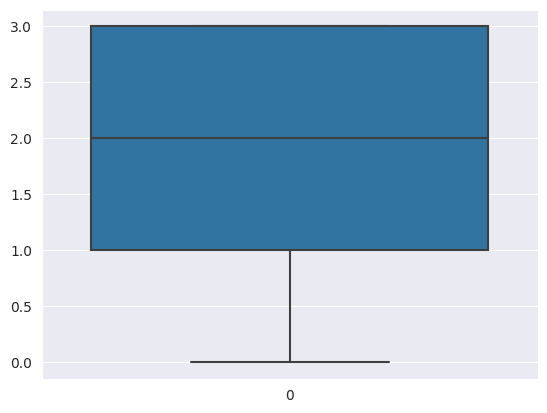

In [44]:
sns.boxplot(data=data["Rent_category"])

***Handling outliers in 7th column***

In [45]:
print(data.columns[6])

Frequency


<Axes: >

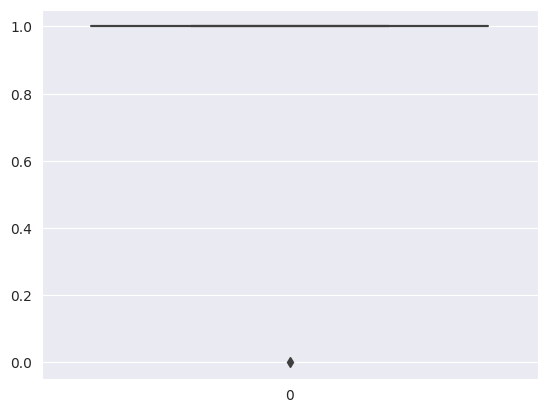

In [46]:
sns.boxplot(data=data["Frequency"])

In [47]:
print(
    data["Frequency"].max(),
    data["Frequency"].min(),
)

1 0


***Handling outliers in 8th column***

In [48]:
print(data.columns[7])

Furnishing


<Axes: >

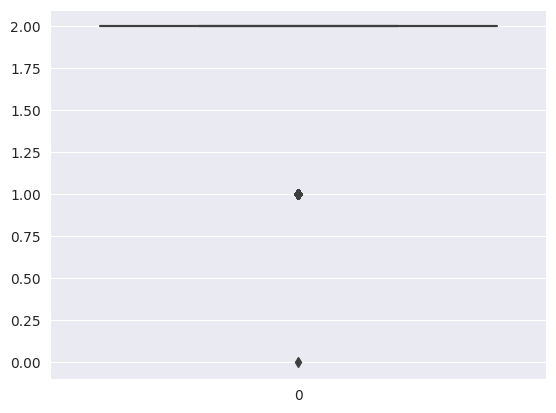

In [49]:
sns.boxplot(data=data["Furnishing"])

***Handling outliers in 9th column***

In [50]:
print(data.columns[8])

Purpose


<Axes: >

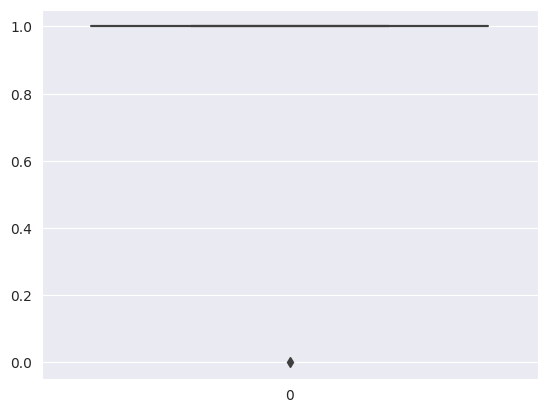

In [51]:
sns.boxplot(data=data["Purpose"])

***Handling outliers in 10th column***

In [52]:
print(data.columns[9])

Posted_date


<Axes: >

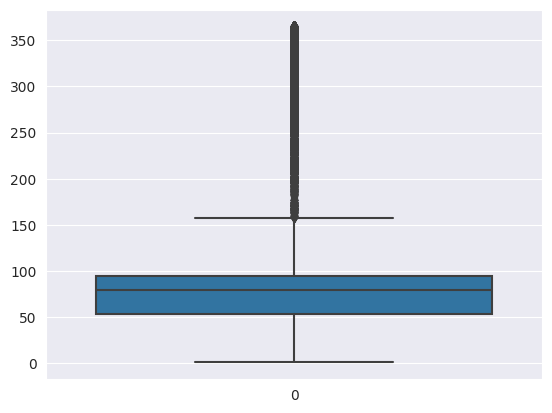

In [53]:
sns.boxplot(data=data["Posted_date"])

In [54]:
print(data["Posted_date"].min(), data["Posted_date"].max())
num_date_outlin = (data["Posted_date"] > 300).sum()
print(num_date_outlin)

1.0 365.0
8689


In [55]:
date_mean = data["Posted_date"].mean()
print(date_mean)

110.61815617211252


In [56]:
data["Posted_date"].loc[data["Posted_date"] > 300] = date_mean

/tmp/ipykernel_18/932951741.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Posted_date"].loc[data["Posted_date"] > 300] = date_mean
/tmp/ipykernel_18/932951741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [57]:
print((data["Posted_date"] > 300).sum())

0


***Handling outliers in 11th column***

In [58]:
print(data.columns[10])

Age_of_listing_in_days


<Axes: >

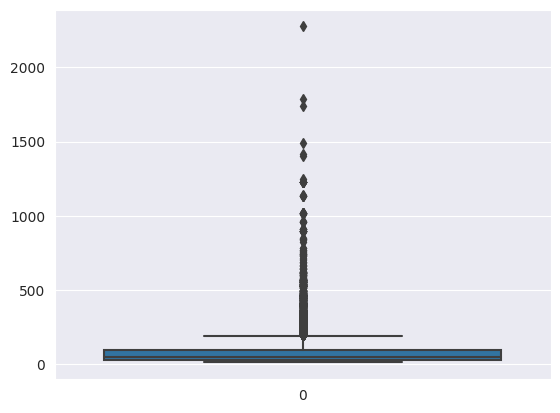

In [59]:
sns.boxplot(data=data["Age_of_listing_in_days"])

In [60]:
print(data["Age_of_listing_in_days"].min(), data["Age_of_listing_in_days"].max())



num_age_outlier = (data["Age_of_listing_in_days"] > 200).sum()



print(num_age_outlier)

11 2276
3314


In [61]:
age_mean = data["Age_of_listing_in_days"].mean()
print(age_mean)

73.8847349465237


In [62]:
data["Age_of_listing_in_days"].loc[data["Age_of_listing_in_days"] > 200] = 200

/tmp/ipykernel_18/2034864674.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Age_of_listing_in_days"].loc[data["Age_of_listing_in_days"] > 200] = 200
/tmp/ipykernel_18/2034864674.py:1: SettingWithCopyWarning: 
A value is trying to 

In [63]:
print((data["Age_of_listing_in_days"] > 200).sum())

0


***Handling outliers in 12th column***

In [64]:
print(data.columns[11])

Latitude


<Axes: >

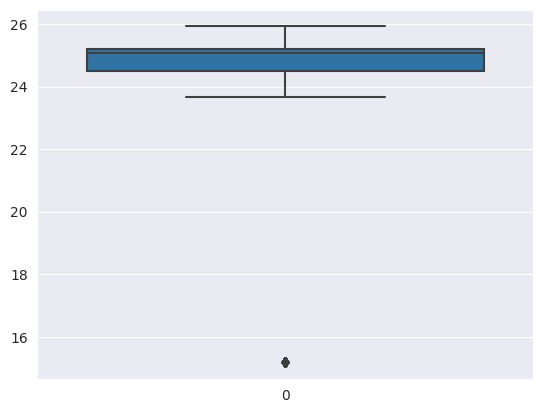

In [65]:
sns.boxplot(data=data["Latitude"])

In [66]:
print(data["Latitude"].min(), data["Latitude"].max())

15.175847 25.9203098


***Handling outliers in 13th column***

In [67]:
print(data.columns[12])

Longitude


<Axes: >

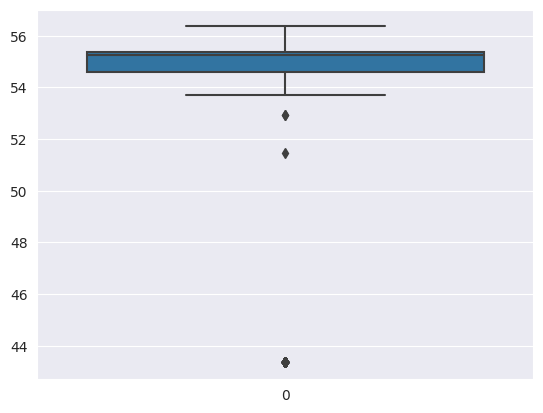

In [68]:
sns.boxplot(data=data["Longitude"])

In [69]:
print(data["Longitude"].min(), data["Longitude"].max())

43.351928 56.36129352186721


***Handling outliers in 14th column***

In [70]:
print(data.columns[13])

Address


<Axes: >

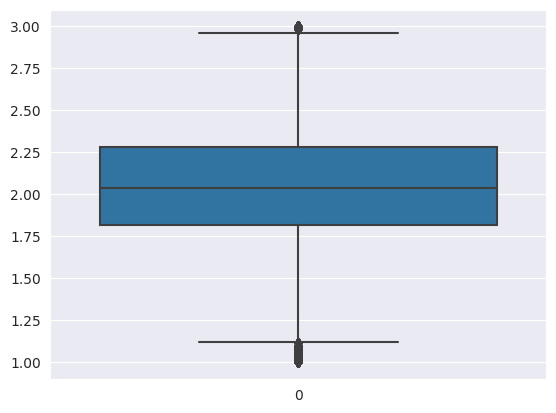

In [71]:
sns.boxplot(data=data["Address"])

In [72]:
address_mean = data["Address"].mean()
print(address_mean)

2.006548904584799


In [73]:
num_outiers = (data["Address"] > 2.5).sum() + (data["Address"] < 1.7).sum()
print(num_outiers)

24210


*replace outliers with mean*

In [74]:
data["Address"].loc[data["Address"] > 2.5] = address_mean
data["Address"].loc[data["Address"] < 1.7] = address_mean

/tmp/ipykernel_18/2041324948.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Address"].loc[data["Address"] > 2.5] = address_mean
/tmp/ipykernel_18/2041324948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [75]:
# check outliers again
num_outiers = (data["Address"] > 2.5).sum() + (data["Address"] < 1.7).sum()
print(num_outiers)

0


***Handling outliers in 15th column***

In [76]:
print(data.columns[14])

Type


<Axes: >

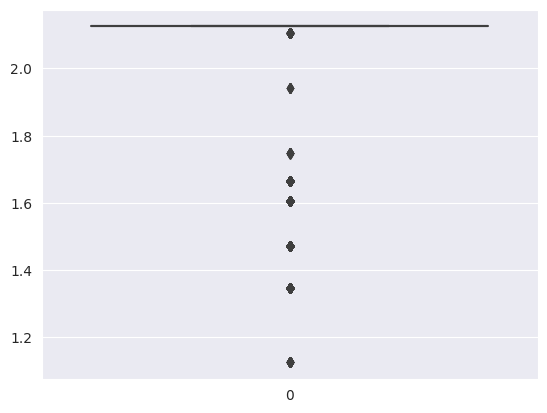

In [77]:
sns.boxplot(data=data["Type"])

In [78]:
print(data["Type"].min(), data["Type"].max())

1.1255198097843415 2.124839720757943


***Handling outliers in 16th column***

In [79]:
print(data.columns[15])

Location


<Axes: >

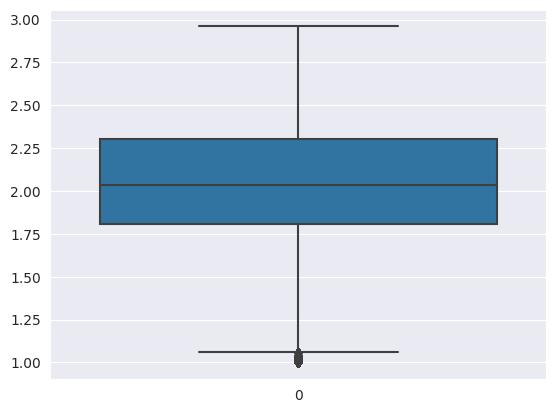

In [80]:
sns.boxplot(data=data["Location"])

In [81]:
print(data["Location"].min(), data["Location"].max())

1.0000000000513714 2.9594095940839864


***Handling outliers in 17th column***

In [82]:
print(data.columns[16])

City


<Axes: >

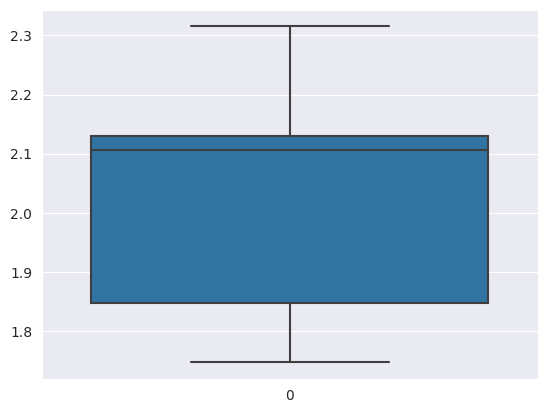

In [83]:
sns.boxplot(data=data["City"])

In [84]:
print(data["City"].min(), data["City"].max())

1.7468233795493622 2.3150388936905792


### ***Scaling***

In [85]:
print(data.columns)

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft',
       'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Posted_date',
       'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Address', 'Type',
       'Location', 'City'],
      dtype='object')


In [86]:
colums_to_scaling = [
    "Beds",
    "Baths",
    "Area_in_sqft",
    "Rent_per_sqft",
    "Furnishing",
    "Posted_date",
    "Age_of_listing_in_days",
    "Latitude",
    "Longitude",
    "Address",
]

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler(feature_range=(1, 2))
scaler.fit(data[colums_to_scaling])

MinMaxScaler(feature_range=(1, 2))

In [89]:
scaler.fit_transform(data[colums_to_scaling])

array([[1.25      , 1.3       , 1.17237558, ..., 1.86721426, 1.84984256,
        1.38225227],
       [1.25      , 1.3       , 1.13580496, ..., 1.86725372, 1.8651801 ,
        1.9914064 ],
       [1.16666667, 1.2       , 1.12492444, ..., 1.86650065, 1.86468562,
        1.38225227],
       ...,
       [1.16666667, 1.1       , 1.09329035, ..., 1.96348344, 1.94198285,
        1.38262106],
       [1.        , 1.        , 1.0347572 , ..., 1.96026806, 1.93963585,
        1.38286807],
       [1.        , 1.        , 1.04291759, ..., 1.96348344, 1.94198285,
        1.38262106]])

In [90]:
data[colums_to_scaling] = scaler.transform(data[colums_to_scaling])

In [91]:
data[colums_to_scaling]

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Furnishing,Posted_date,Age_of_listing_in_days,Latitude,Longitude,Address
0,1.250000,1.3,1.172376,1.248099,2.0,1.220736,1.179894,1.867214,1.849843,1.382252
1,1.250000,1.3,1.135805,1.351617,2.0,1.224080,1.174603,1.867254,1.865180,1.991406
2,1.166667,1.2,1.124924,1.269080,1.5,1.267559,1.105820,1.866501,1.864686,1.382252
3,1.250000,1.3,1.379710,1.204453,2.0,1.180602,1.243386,1.867214,1.849843,1.666039
4,1.416667,1.6,1.683659,1.182216,2.0,1.153846,1.285714,1.867254,1.865180,1.382252
...,...,...,...,...,...,...,...,...,...,...
73729,1.000000,1.0,1.017630,1.143431,2.0,1.366616,1.650794,1.960268,1.939636,1.454355
73734,1.083333,1.0,1.042918,1.178571,2.0,1.366616,1.693122,1.961948,1.939852,1.447141
73735,1.166667,1.1,1.093290,1.078571,2.0,1.284281,1.079365,1.963483,1.941983,1.382621
73737,1.000000,1.0,1.034757,1.119332,2.0,1.366616,1.624339,1.960268,1.939636,1.382868


In [92]:
data

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Latitude,Longitude,Address,Type,Location,City
0,124000,1.250000,1.3,1.172376,1.248099,3,1,2.0,1,1.220736,1.179894,1.867214,1.849843,1.382252,2.124840,2.542257,2.129017
1,140000,1.250000,1.3,1.135805,1.351617,3,1,2.0,1,1.224080,1.174603,1.867254,1.865180,1.991406,2.124840,1.676570,2.129017
2,99000,1.166667,1.2,1.124924,1.269080,3,1,1.5,1,1.267559,1.105820,1.866501,1.864686,1.382252,2.124840,2.183177,2.129017
3,220000,1.250000,1.3,1.379710,1.204453,1,1,2.0,1,1.180602,1.243386,1.867214,1.849843,1.666039,1.345865,2.542257,2.129017
4,350000,1.416667,1.6,1.683659,1.182216,1,1,2.0,1,1.153846,1.285714,1.867254,1.865180,1.382252,1.664384,1.676570,2.129017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73729,10000,1.000000,1.0,1.017630,1.143431,2,1,2.0,1,1.366616,1.650794,1.960268,1.939636,1.454355,2.124840,2.061570,2.026545
73734,25000,1.083333,1.0,1.042918,1.178571,2,1,2.0,1,1.366616,1.693122,1.961948,1.939852,1.447141,1.664384,2.036955,2.026545
73735,22000,1.166667,1.1,1.093290,1.078571,2,1,2.0,1,1.284281,1.079365,1.963483,1.941983,1.382621,2.124840,2.048729,2.026545
73737,14000,1.000000,1.0,1.034757,1.119332,2,1,2.0,1,1.366616,1.624339,1.960268,1.939636,1.382868,2.124840,2.061570,2.026545


**Data Analysis**

In [93]:
df = pd.read_csv("/kaggle/input/real-estate-goldmine/dubai_properties.csv")

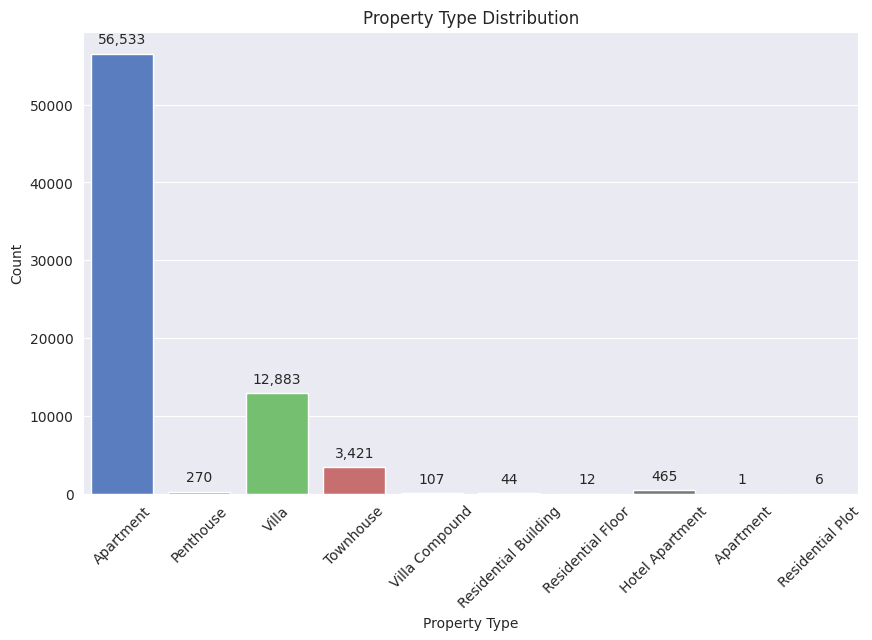

In [94]:
# Property Type Distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Type', data=df, palette='muted')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

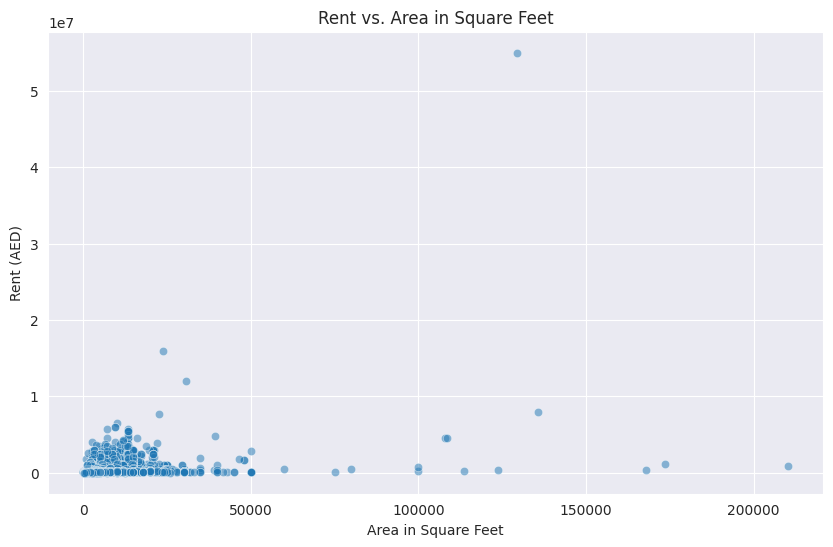

In [95]:
# Relationship between Rent and Area in Square Feet
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df, alpha=0.5)
plt.title('Rent vs. Area in Square Feet')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent (AED)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


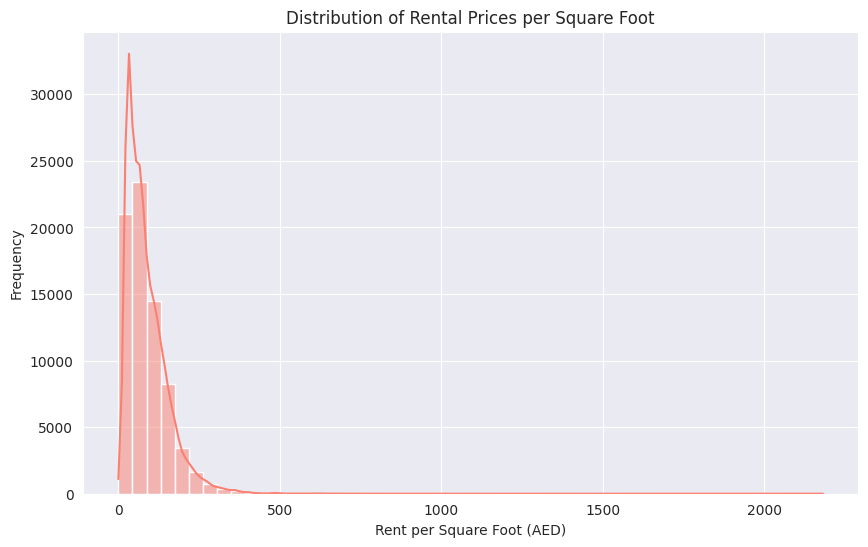

In [96]:
# Distribution of Rental Prices per Square Foot
plt.figure(figsize=(10,6))
sns.histplot(df['Rent_per_sqft'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Rental Prices per Square Foot')
plt.xlabel('Rent per Square Foot (AED)')
plt.ylabel('Frequency')
plt.show()

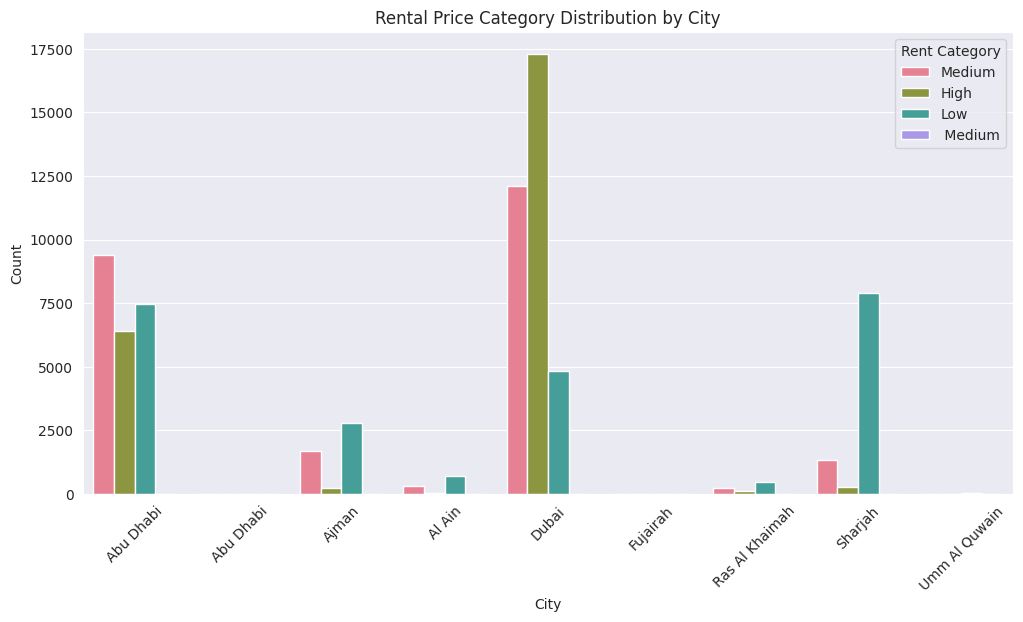

In [97]:
# Rental Price Category Distribution by City
plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Rent_category', data=df, palette='husl')
plt.title('Rental Price Category Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Rent Category')
plt.xticks(rotation=45)
plt.show()

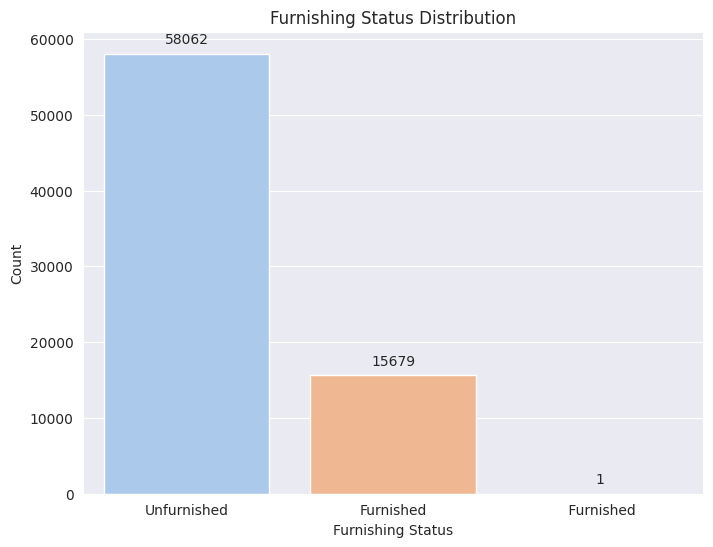

In [98]:
# Furnishing Status Distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Furnishing', data=df, palette='pastel')
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


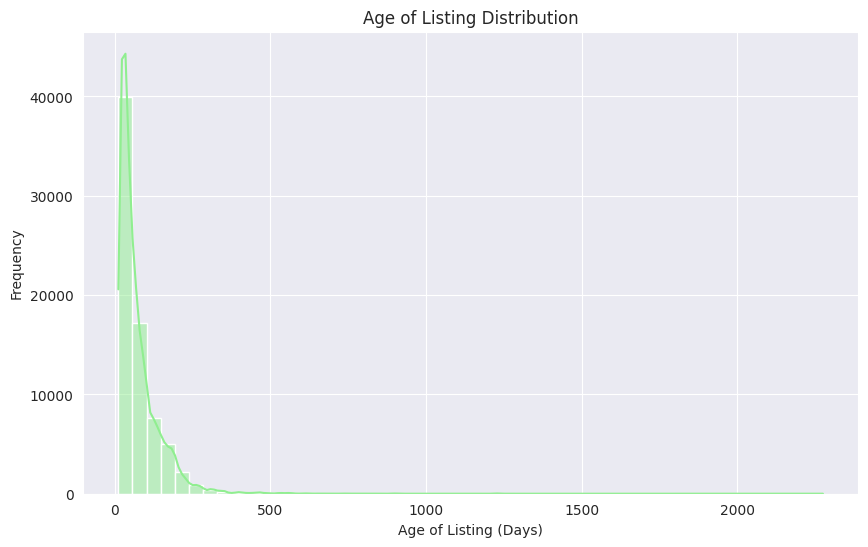

In [99]:
# Age of Listing Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age_of_listing_in_days'], bins=50, kde=True, color='lightgreen')
plt.title('Age of Listing Distribution')
plt.xlabel('Age of Listing (Days)')
plt.ylabel('Frequency')
plt.show()

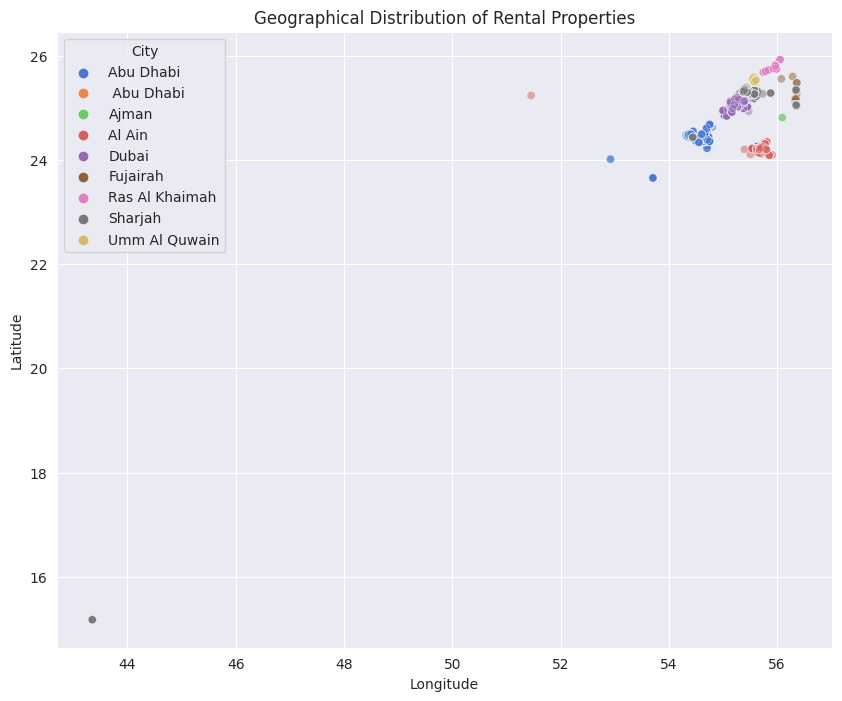

In [100]:
# Geographical Distribution of Rental Properties
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='City', data=df, palette='muted', alpha=0.5)
plt.title('Geographical Distribution of Rental Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City')
plt.show()

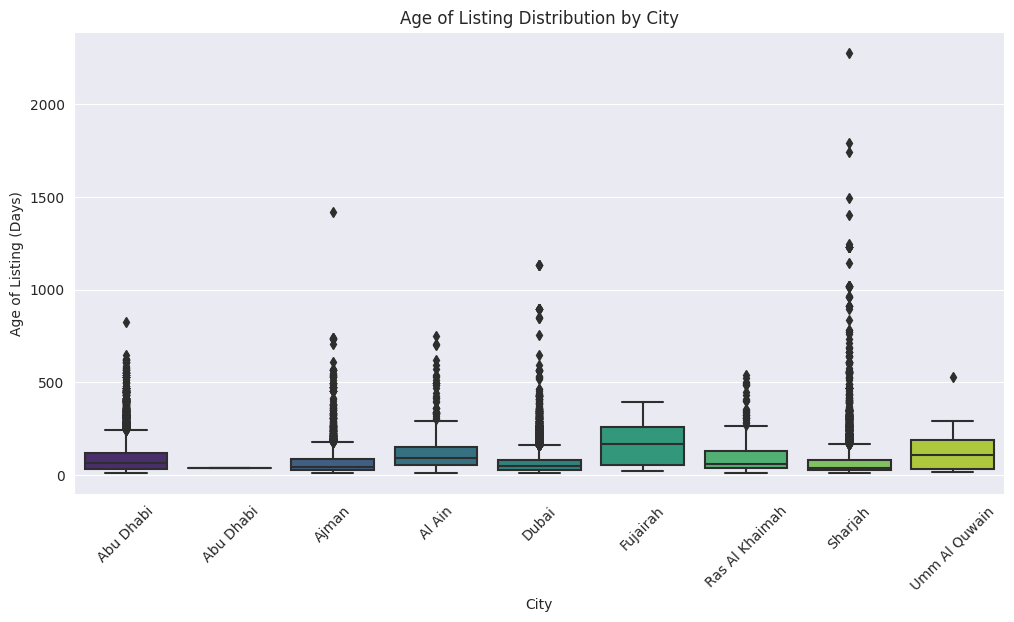

In [101]:
# Age of Listing Distribution by City
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Age_of_listing_in_days', data=df, palette='viridis')
plt.title('Age of Listing Distribution by City')
plt.xlabel('City')
plt.ylabel('Age of Listing (Days)')
plt.xticks(rotation=45)
plt.show()

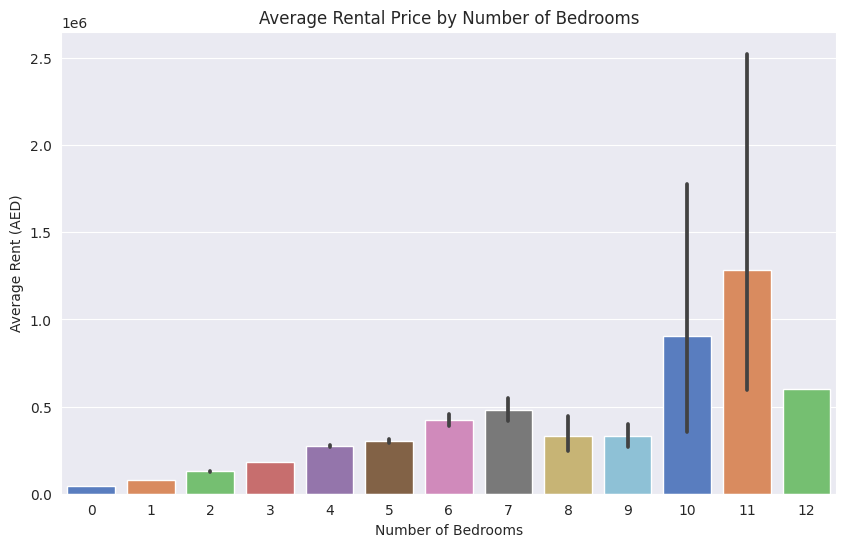

In [102]:
# Average Rental Price by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.barplot(x='Beds', y='Rent', data=df, palette='muted')
plt.title('Average Rental Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent (AED)')
plt.show()

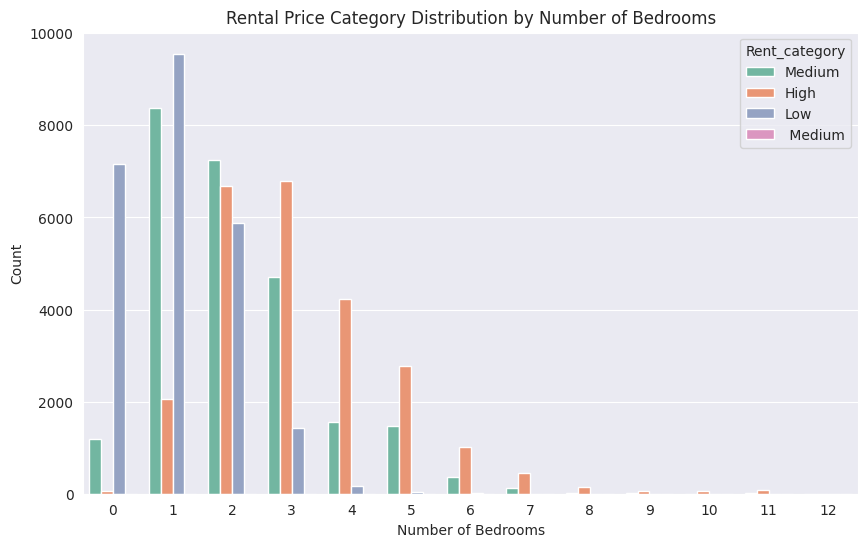

In [103]:
# Rental Price Category Distribution by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.countplot(x='Beds', hue='Rent_category', data=df, palette='Set2')
plt.title('Rental Price Category Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

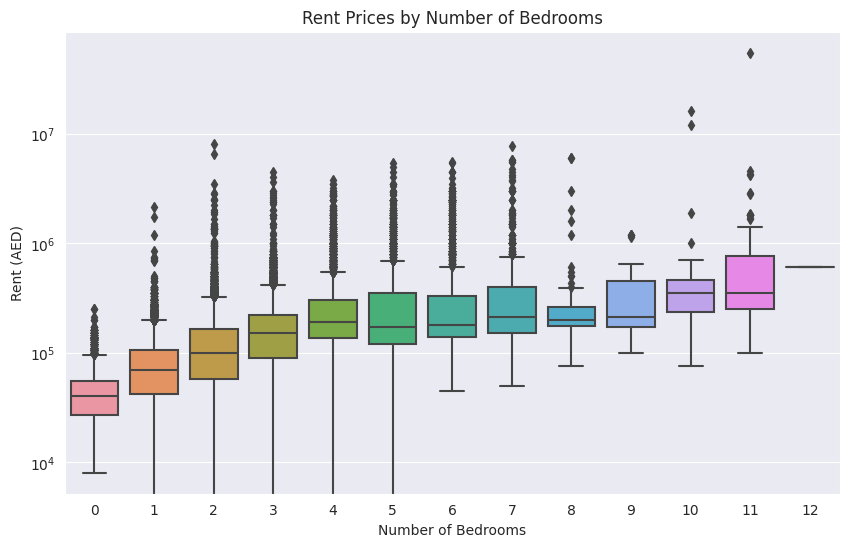

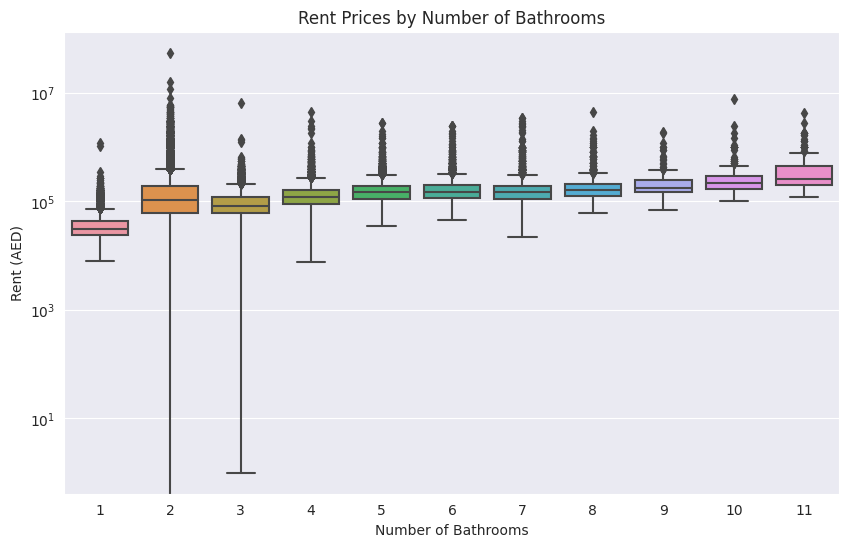

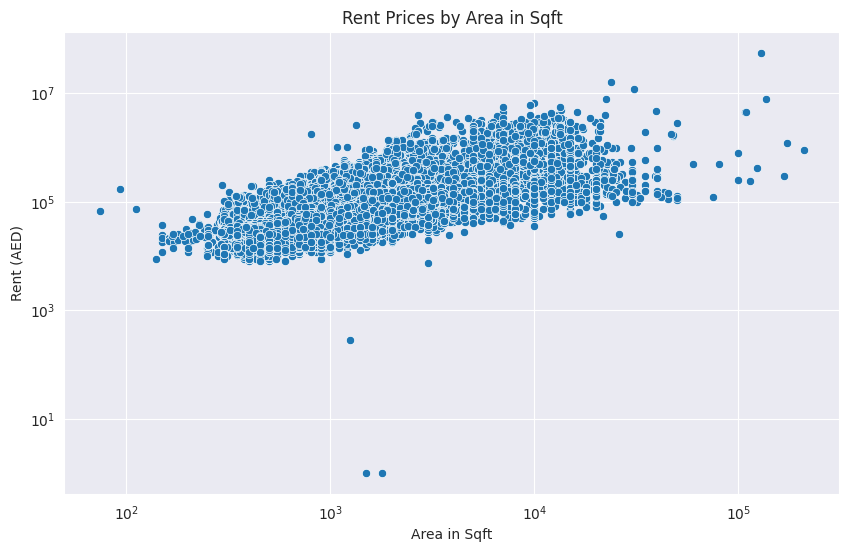

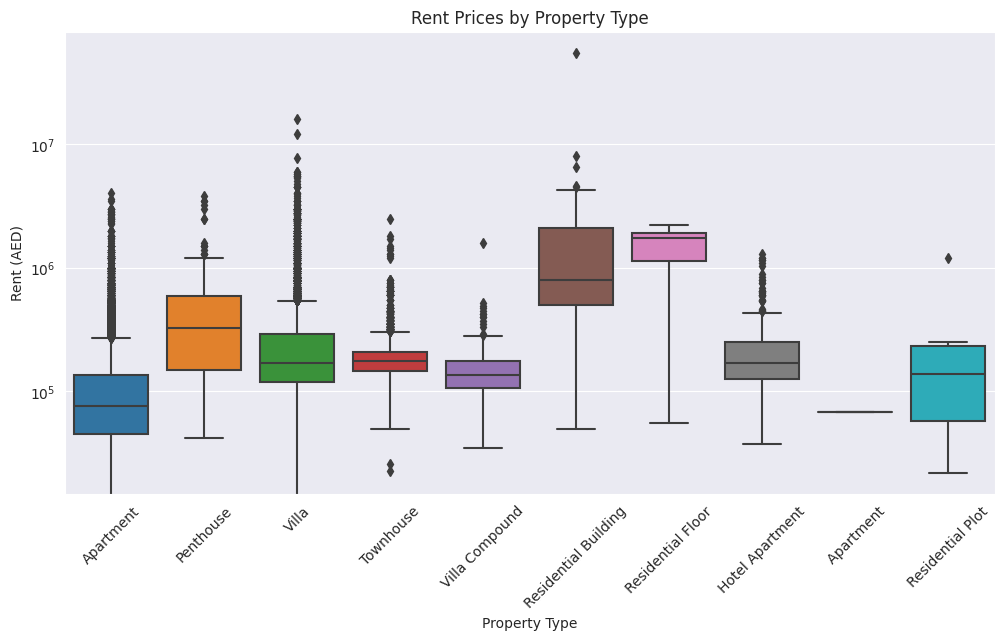

In [104]:
# Analyzing the relationship between rent and number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Beds', y='Rent', data=df)
plt.title('Rent Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Baths', y='Rent', data=df)
plt.title('Rent Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and area in sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df)
plt.title('Rent Prices by Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Rent (AED)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rent', data=df)
plt.title('Rent Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

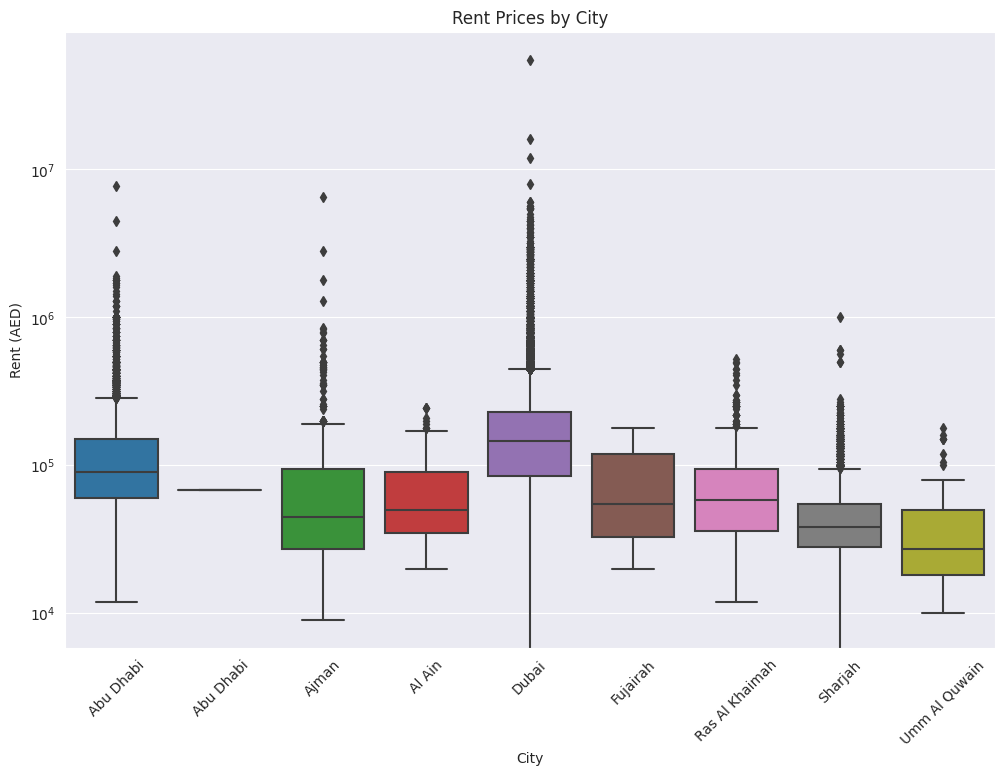

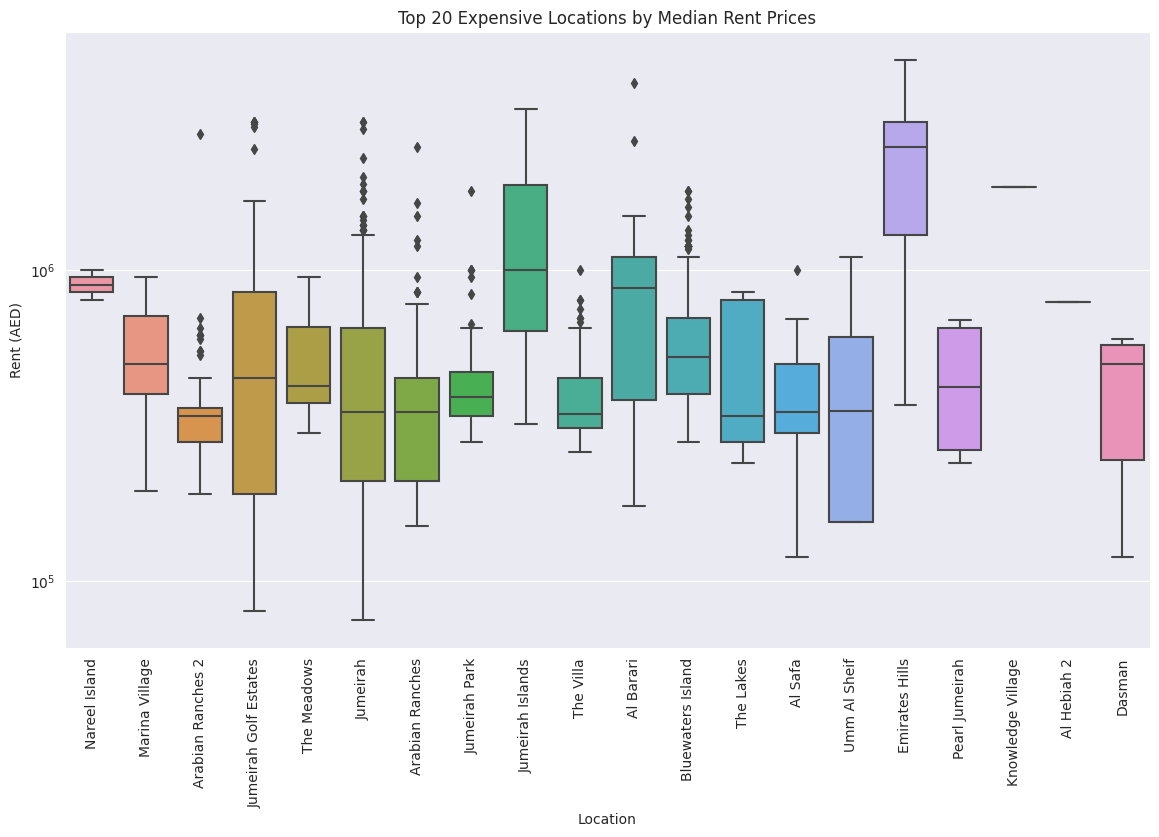

In [105]:
# Analyzing how rent varies across different cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Rent', data=df)
plt.title('Rent Prices by City')
plt.xlabel('City')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# Analyzing how rent varies across different locations within cities
# Due to potentially large number of locations, we display only the top 20 locations by median rent
top_locations = df.groupby('Location')['Rent'].median().sort_values(ascending=False).head(20).index
filtered_data = df[df['Location'].isin(top_locations)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Rent', data=filtered_data)
plt.title('Top 20 Expensive Locations by Median Rent Prices')
plt.xlabel('Location')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Least Expensive Areas for Renting (Top 10):
Location
Hamriyah Free Zone                 12000.0
Al Raudah                          12000.0
Maysaloon                          13000.0
Masfoot                            13500.0
Al Hawiyah                         15000.0
Al Yarmook                         15000.0
Al Bataeh                          16000.0
Al Humaid City                     16000.0
Al Rass                            16000.0
Emirates Modern Industrial Area    16000.0
Name: Rent, dtype: float64

Most Expensive Areas for Renting (Top 10):
Location
Jumeirah Golf Estates     450000.0
Dasman                    500000.0
Marina Village            500000.0
Bluewaters Island         527500.0
Al Hebiah 2               790000.0
Al Barari                 875000.0
Nareel Island             900000.0
Jumeirah Islands         1000000.0
Knowledge Village        1859550.0
Emirates Hills           2499000.0
Name: Rent, dtype: float64


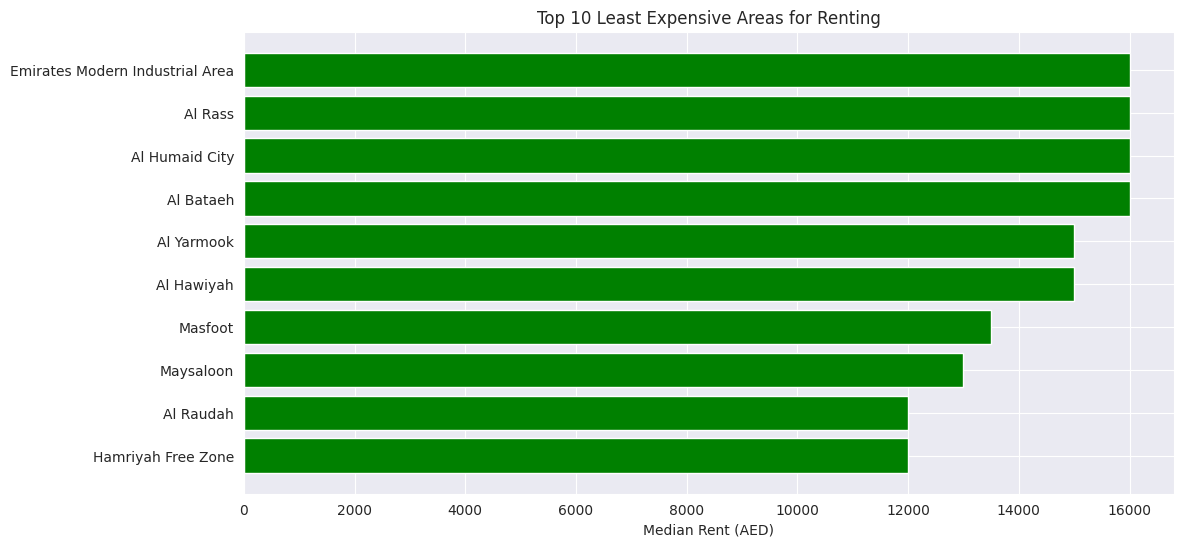

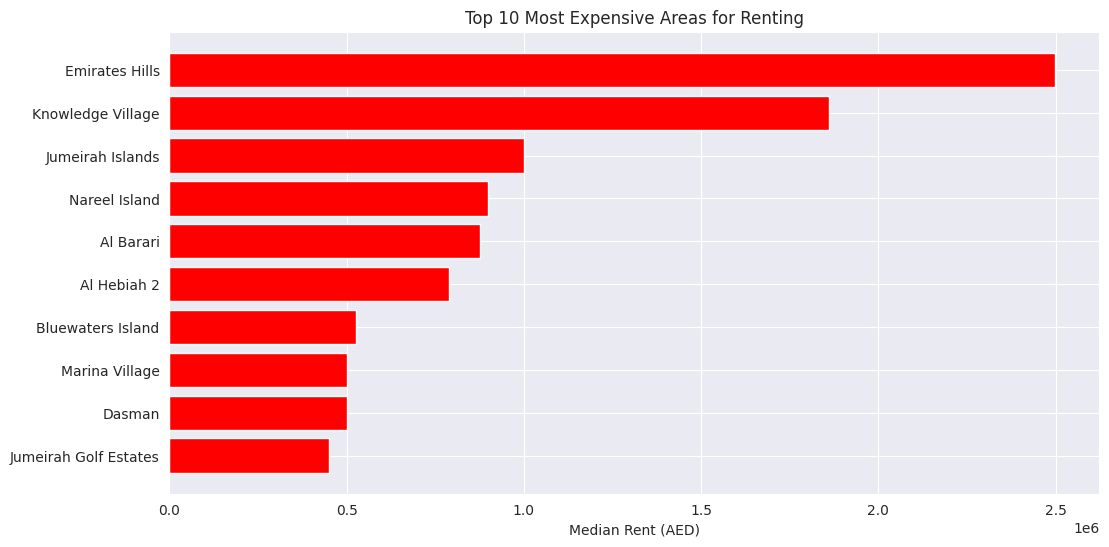

In [106]:
# Identify the most expensive and least expensive areas for renting
# Calculate median rent for each location and sort them
location_rent_stats = df.groupby('Location')['Rent'].median().sort_values()

# Display the least expensive areas
print("Least Expensive Areas for Renting (Top 10):")
print(location_rent_stats.head(10))

# Display the most expensive areas
print("\nMost Expensive Areas for Renting (Top 10):")
print(location_rent_stats.tail(10))

# Least expensive areas
plt.figure(figsize=(12, 6))
least_expensive = location_rent_stats.head(10)
plt.barh(least_expensive.index, least_expensive.values, color='green')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Least Expensive Areas for Renting')
plt.show()

# Most expensive areas
plt.figure(figsize=(12, 6))
most_expensive = location_rent_stats.tail(10)
plt.barh(most_expensive.index, most_expensive.values, color='red')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Most Expensive Areas for Renting')
plt.show()

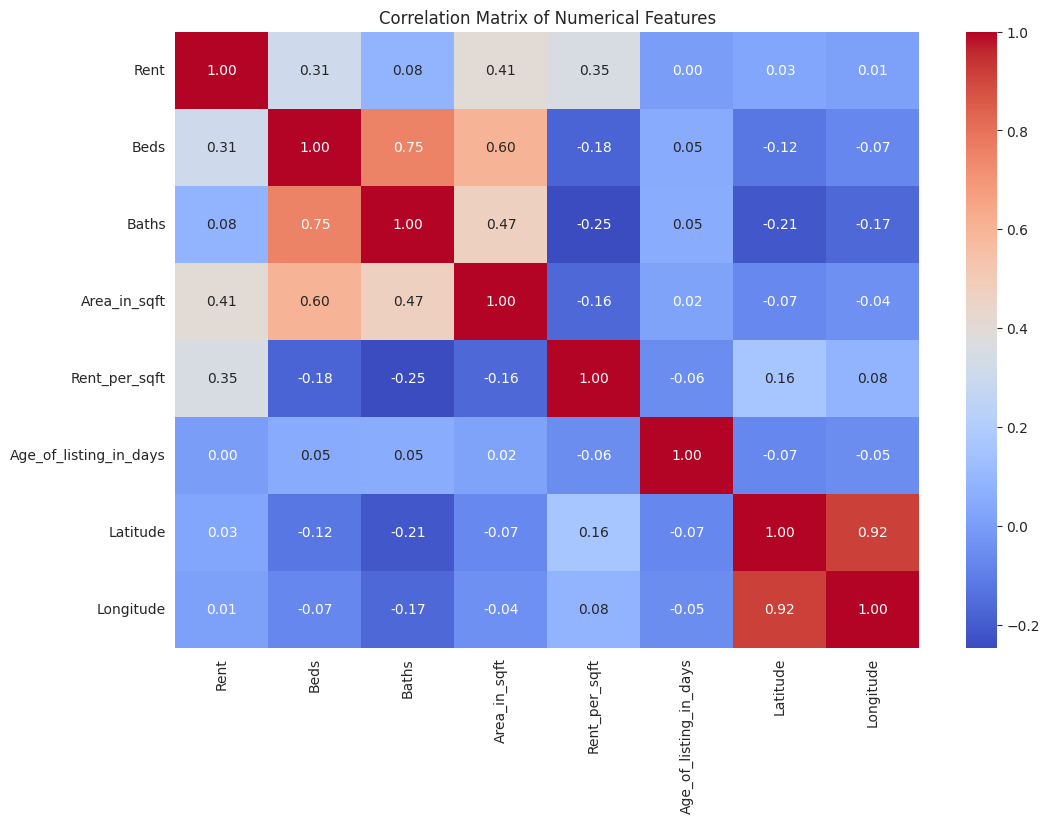

In [107]:
# Analyzing the correlation between numerical features and rent prices
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()